<a href="https://colab.research.google.com/github/chilaact/predict_aquatic_toxity/blob/master/predict_aquatic_toxity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# QSAR Aquatic Toxicity Prediction with Simple Neural Networks Using TensorFlow

Mount drive

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Data Preparation**

Import libraries

In [0]:
from pandas import read_csv
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_squared_error

## Load data

In [17]:
data = read_csv("/content/drive/My Drive/Colab Notebooks/task/qsar_aquatic_toxicity.csv", sep=";")
data

,TPSA,SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,quantitive response
0,0.00,0.000,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.000,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.000,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.000,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.000,0,4.068,2.758,0.695,0,0,5.979
...,...,...,...,...,...,...,...,...,...
541,24.06,35.776,2,3.326,2.837,0.849,2,0,4.651
542,9.23,11.000,0,3.275,2.727,0.874,0,0,3.953
543,0.00,0.000,0,5.165,3.111,0.732,0,0,6.219
544,13.14,9.507,0,2.859,2.614,0.827,0,0,4.995


dataset from https://archive.ics.uci.edu/ml/datasets/QSAR+aquatic+toxicity

**Data information and characteristics**

In [29]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 9 columns):
TPSA                   546 non-null float64
SAacc                  546 non-null float64
H-050                  546 non-null int64
MLOGP                  546 non-null float64
RDCHI                  546 non-null float64
GATS1p                 546 non-null float64
nN                     546 non-null int64
C-040                  546 non-null int64
quantitive response    546 non-null float64
dtypes: float64(6), int64(3)
memory usage: 38.5 KB


,TPSA,SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,quantitive response
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,48.472930,58.869018,0.937729,2.313493,2.492299,1.046264,1.003663,0.353480,4.658421
std,46.763983,68.166554,1.618632,1.741797,0.811004,0.403677,1.397240,0.806827,1.665215
min,0.000000,0.000000,0.000000,-6.446000,1.000000,0.281000,0.000000,0.000000,0.122000
25%,15.790000,11.000000,0.000000,1.232500,1.975000,0.737000,0.000000,0.000000,3.601500
50%,40.460000,42.683000,0.000000,2.273500,2.344000,1.020500,1.000000,0.000000,4.516000
75%,70.022500,77.492750,1.000000,3.392750,2.911000,1.266500,2.000000,0.000000,5.607500
max,347.320000,571.952000,18.000000,9.148000,6.439000,2.500000,11.000000,11.000000,10.047000


## Split data

In [0]:
x_train, x_test, y_train, y_test = train_test_split(data.drop(axis=0, columns='quantitive response'),
                                                   data['quantitive response'],
                                                   test_size=0.3)

## Train and test the models

In [19]:
lnr = LinearRegression()
mlp = MLPRegressor()

lnr.fit(x_train, y_train)
mlp.fit(x_train, y_train)

hasil_lnr = lnr.predict(x_test)
hasil_mlp = mlp.predict(x_test)

print("Mead Squared Error Linear Regression : " ,mean_squared_error(y_test, hasil_lnr))
print("Mead Squared Error Multilayer Perceptron : " ,mean_squared_error(y_test, hasil_mlp))

Mead Squared Error Linear Regression :  1.2413777151030616
Mead Squared Error Multilayer Perceptron :  1.3617861820538901


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


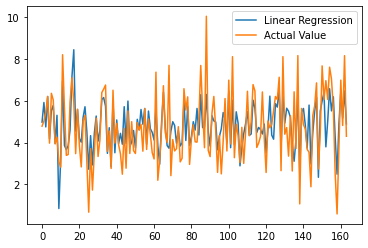

In [20]:
plt.plot(list(hasil_lnr), label='Linear Regression')
plt.plot(list(y_test), label='Actual Value')

plt.legend(loc="upper right")

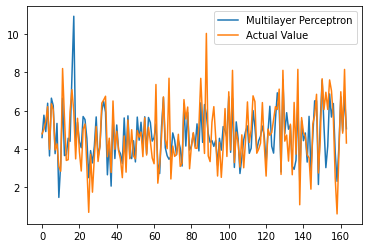

In [21]:
plt.plot(list(hasil_mlp), label='Multilayer Perceptron')
plt.plot(list(y_test), label='Actual Value')

plt.legend(loc="upper right")

<h2>TENSORFLOW PART</h2>

In [0]:
%tensorflow_version 2.x
from tensorflow.keras import Sequential, layers, optimizers

## Modeling

In [0]:
def Simple_NN():
  model = Sequential([
    layers.Dense(8, activation='relu', input_shape=[8]),
    layers.Dense(8, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = optimizers.RMSprop(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

Consists of :
8 nodes in the input layer
8 nodes in hidden layers 1 and 2 along with the activation function used is ReLU also 1 node in the output because this case is regression

In [24]:
model = Simple_NN()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_4 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 9         
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


## Training model

In [25]:
model.fit(x_train, y_train, epochs=100, validation_split = 0.2, verbose=1)

Epoch 1/100
10/10 [==============================] - 0s 26ms/step - loss: 141.0730 - mae: 8.6105 - mse: 145.9619 - val_loss: 126.9364 - val_mae: 7.5360 - val_mse: 116.1334
Epoch 2/100
10/10 [==============================] - 0s 8ms/step - loss: 106.2819 - mae: 7.0292 - mse: 103.6185 - val_loss: 101.6067 - val_mae: 6.8300 - val_mse: 93.4722
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 83.1239 - mae: 6.4344 - mse: 83.2524 - val_loss: 85.2209 - val_mae: 6.0706 - val_mse: 78.5657
Epoch 4/100
10/10 [==============================] - 0s 7ms/step - loss: 67.5961 - mae: 5.7371 - mse: 66.6710 - val_loss: 68.0152 - val_mae: 5.5333 - val_mse: 63.2673
Epoch 5/100
10/10 [==============================] - 0s 6ms/step - loss: 54.2696 - mae: 5.1892 - mse: 53.3945 - val_loss: 55.7117 - val_mae: 5.0337 - val_mse: 51.9595
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 42.1673 - mae: 4.6828 - mse: 42.5946 - val_loss: 44.2731 - val_mae: 4.5729 - val_mse

## Using model to predict the <b>x_test</b>

In [26]:
hasil_tf = model.predict(x_test)

# HASIL PREDIKSI
hasil_tf.ravel()

array([ 4.7949767,  5.128289 ,  4.98638  ,  6.6600437,  3.7127714,
        6.052859 ,  6.456508 ,  3.7442138,  4.5975523,  0.7132771,
        3.4009037,  6.5422997,  3.9025586,  4.487852 ,  3.5740073,
        4.3707924,  7.7371235, 11.32973  ,  4.228369 ,  5.7237353,
        4.5572453,  4.5277414,  5.1677456,  5.682678 ,  5.0145636,
        2.5405107,  3.867102 ,  2.8707588,  4.2771564,  5.2900405,
        3.6550634,  4.148153 ,  6.1891823,  6.8103986,  5.424333 ,
        2.597266 ,  4.39452  ,  2.2668402,  6.040803 ,  3.608735 ,
        4.769888 ,  4.1161413,  3.9351425,  3.2954051,  5.9755483,
        3.2829192,  5.9490585,  3.564507 ,  3.476902 ,  4.216791 ,
        3.3712018,  5.1269116,  4.2000995,  5.727246 ,  4.025886 ,
        5.8182707,  3.0860531,  5.7561026,  5.1008997,  4.4494534,
        3.9007905,  5.4737506,  3.438226 ,  2.8134587,  5.3843527,
        6.705077 ,  4.280238 ,  3.8952887,  3.6472638,  4.0200453,
        4.9011   ,  4.739975 ,  3.6142704,  4.410062 ,  3.9411

## Evaluate the model using <b>mean squared error</b>

In [27]:
mean_squared_error(y_test, hasil_tf)

1.4392438071994318

Getting smaller the MSE of a model, getting better model in predicting

## Line chart

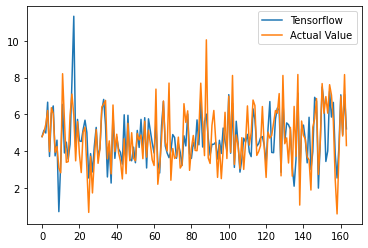

In [28]:
plt.plot(list(hasil_tf), label='Tensorflow')
plt.plot(list(y_test), label='Actual Value')

plt.legend(loc="upper right")